# Transmon qubit

## Exercise 1

In [1]:
import numpy as np
import scipy.sparse as sp

def Htransmon(nmax, ng=0, EJ=1, EC=1/95.):
    """Return the sparse matrix for the Hamiltonian of a transmon qubit
    with the given parameters.
    
    Parameters
    ----------
    nmax    -- maximum number of positive and negative charge excitations
    ng      -- charge displacement
    EJ      -- Josephson energy (a.u.)
    EC      -- Charging energy (a.u.)"""
    
    dimension = 2*nmax+1 # Dimension of Hilbert space
    N2 = sp.diags((np.arange(-nmax, nmax+1, 1) - ng)**2, 0,
                  shape=(dimension, dimension))
    Sup = sp.diags([1.0], [1], shape=(dimension,dimension))
    Sdo = Sup.T

    return 4 * EC * N2 - (EJ/2.0) * (Sup + Sdo)

## Exercise 2

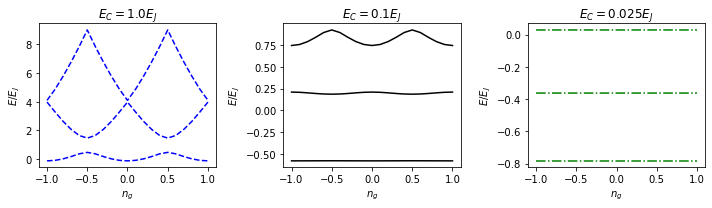

In [2]:
from tools import lowest_eigenvalues
import matplotlib.pyplot as plt

def exercise2():
    ng = np.linspace(-1., 1., 21)
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10,3))
    for (EC, s, axi) in [(1.0, 'b--', ax1),
                         (1/10., 'k-', ax2),
                         (1/40., 'g-.', ax3)]:
        λ = np.array([lowest_eigenvalues(Htransmon(nmax=8, ng=n, EC=EC, EJ=1.), 3)
                      for n in ng])
        axi.plot(ng, λ[:,0], s, label=f'$E_C={EC}$')
        axi.plot(ng, λ[:,1:], s)
        axi.set_xlabel('$n_g$')
        axi.set_ylabel('$E/E_J$')
        axi.set_title(f'$E_C={EC}E_J$')
    plt.tight_layout()
    plt.savefig('./figures/fig-transmon-levels.png')
    plt.show()

exercise2()

## Exercise 3

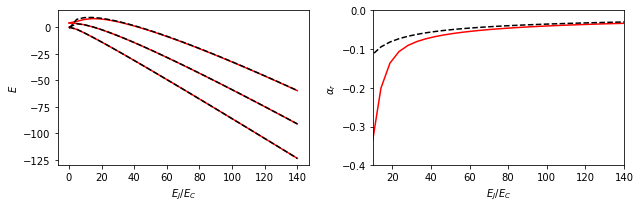

In [3]:
def exercise3():
    EJEC = np.linspace(0.1, 140, 31)
    EC = 1.
    E = np.array([lowest_eigenvalues(Htransmon(nmax=20, EC=EC, EJ=EC*EJEC), 3)
                  for EJEC in EJEC])
    n = np.arange(3)
    Eth = np.array([-EJ + np.sqrt(8*EJ*EC)*(0.5+n)-EC*(6*n**2+6*n+3)/12
                    for EJEC in EJEC
                    for EJ in [EC*EJEC]])
    
    αr = (E[:,2]+E[:,0]-2*E[:,1])/(E[:,1]-E[:,0])
    αrth = -np.sqrt(1./(8*EJEC))

    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(9,3))
    ax1.plot(EJEC, E, 'r', label='eigenvalues')
    ax1.plot(EJEC, Eth, 'k--', label='perturb.')
    ax1.set_ylabel('$E$')
    ax1.set_xlabel('$E_J/E_C$')
    ax2.plot(EJEC, αr, 'r', label='eigenvalues')
    ax2.plot(EJEC, αrth, 'k--', label='perturb.')
    ax2.set_ylabel('$\\alpha_r$')
    ax2.set_xlabel('$E_J/E_C$')
    ax2.set_xlim([10,140])
    ax2.set_ylim([-0.4,0.0])
    fig.tight_layout()
    fig.savefig('./figures/fig-transmon-anharmonicity.png')
    plt.show()
    
exercise3()

## Exercise 4

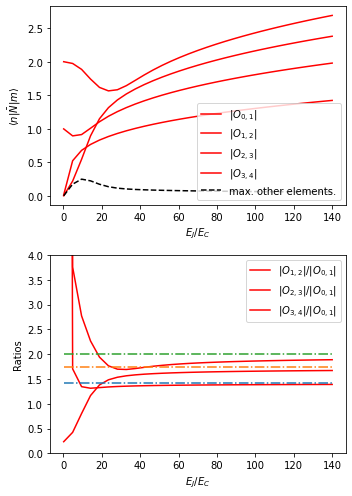

In [4]:
from tools import lowest_eigenstates

def exercise4():
    #
    # Create the transmon Hamiltonian and diagonalize for the lowest
    # 4 o 5 levels. Project the driving term onto those levels and
    # provide evidence of the statement, at least in the limit in
    # which the transmon behaves as an anharmonic oscillator
    #
    
    EJEC = np.linspace(0.1, 140, 31)
    nmax = 8
    others = []
    diag1 = []
    d = 2*nmax+1
    N = sp.diags(np.arange(-nmax, nmax+1, 1), 0, shape=(d,d))
    for EJ in EJEC:
        H = Htransmon(nmax=nmax, EC=1., EJ=EJ, ng=0.)
        E, U = lowest_eigenstates(H, 5)
        op = U.T.conj() @ (N @ U)
        diag1.append(np.abs(np.diag(op, 1)))
        op -= np.diag(np.diag(op, 1), 1) + np.diag(np.diag(op, -1), -1)
        others.append(np.max(np.abs(op)))
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5,7))
    diag1 = np.abs(diag1)
    ax1.plot(EJEC, diag1[:,0], 'r', label=r'$|O_{0,1}|$')
    ax1.plot(EJEC, diag1[:,1], 'r', label=r'$|O_{1,2}|$')
    ax1.plot(EJEC, diag1[:,2], 'r', label=r'$|O_{2,3}|$')
    ax1.plot(EJEC, diag1[:,3], 'r', label=r'$|O_{3,4}|$')
    ax1.plot(EJEC, others, 'k--', label='max. other elements.')
    ax1.set_ylabel(r'$\langle{n|\bar{N}|m}\rangle$')
    ax1.set_xlabel(r'$E_J/E_C$')
    ax1.legend()
    ax2.plot(EJEC, diag1[:,1]/diag1[:,0], 'r', label=r'$|O_{1,2}|/|O_{0,1}|$')
    ax2.plot(EJEC, diag1[:,2]/diag1[:,0], 'r', label=r'$|O_{2,3}|/|O_{0,1}|$')
    ax2.plot(EJEC, diag1[:,3]/diag1[:,0], 'r', label=r'$|O_{3,4}|/|O_{0,1}|$')
    ax2.plot(EJEC, EJEC*0+np.sqrt(2), '-.')
    ax2.plot(EJEC, EJEC*0+np.sqrt(3), '-.')
    ax2.plot(EJEC, EJEC*0+np.sqrt(4), '-.')
    ax2.set_ylabel('Ratios')
    ax2.set_xlabel(r'$E_J/E_C$')
    ax2.set_ylim([0,4])
    ax2.legend()
    fig.tight_layout()
    fig.savefig('./figures/fig-transmon-coupling.png')
    plt.show()
    
exercise4()